In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
from pathlib import Path
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 160)

def find_project_root():
    here = Path.cwd().resolve()
    for p in [here, *here.parents]:
        if (p / "data").is_dir() and (p / "src").is_dir():
            return p
    # fallback al tuo percorso noto su Windows
    return Path(r"C:\Users\MARTINADICORATO\Diabete_New\Diabete")

PROJECT_ROOT = find_project_root()
DATA_DIR = PROJECT_ROOT / "data"
CSV_PATH = DATA_DIR / "diabete_data.csv"

# Se non esiste, tenta una ricerca rapida
if not CSV_PATH.exists():
    try:
        CSV_PATH = next(PROJECT_ROOT.rglob("diabete_data.csv"))
    except StopIteration:
        raise FileNotFoundError(f"Non trovo diabete_data.csv sotto {PROJECT_ROOT}")

print("PROJECT_ROOT:", PROJECT_ROOT)
print("CSV:", CSV_PATH)

PROJECT_ROOT: C:\Users\MARTINADICORATO
CSV: C:\Users\MARTINADICORATO\Diabete_New\Diabete\data\diabete_data.csv


In [3]:
df = pd.read_csv(CSV_PATH)
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.isna().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<Axes: >

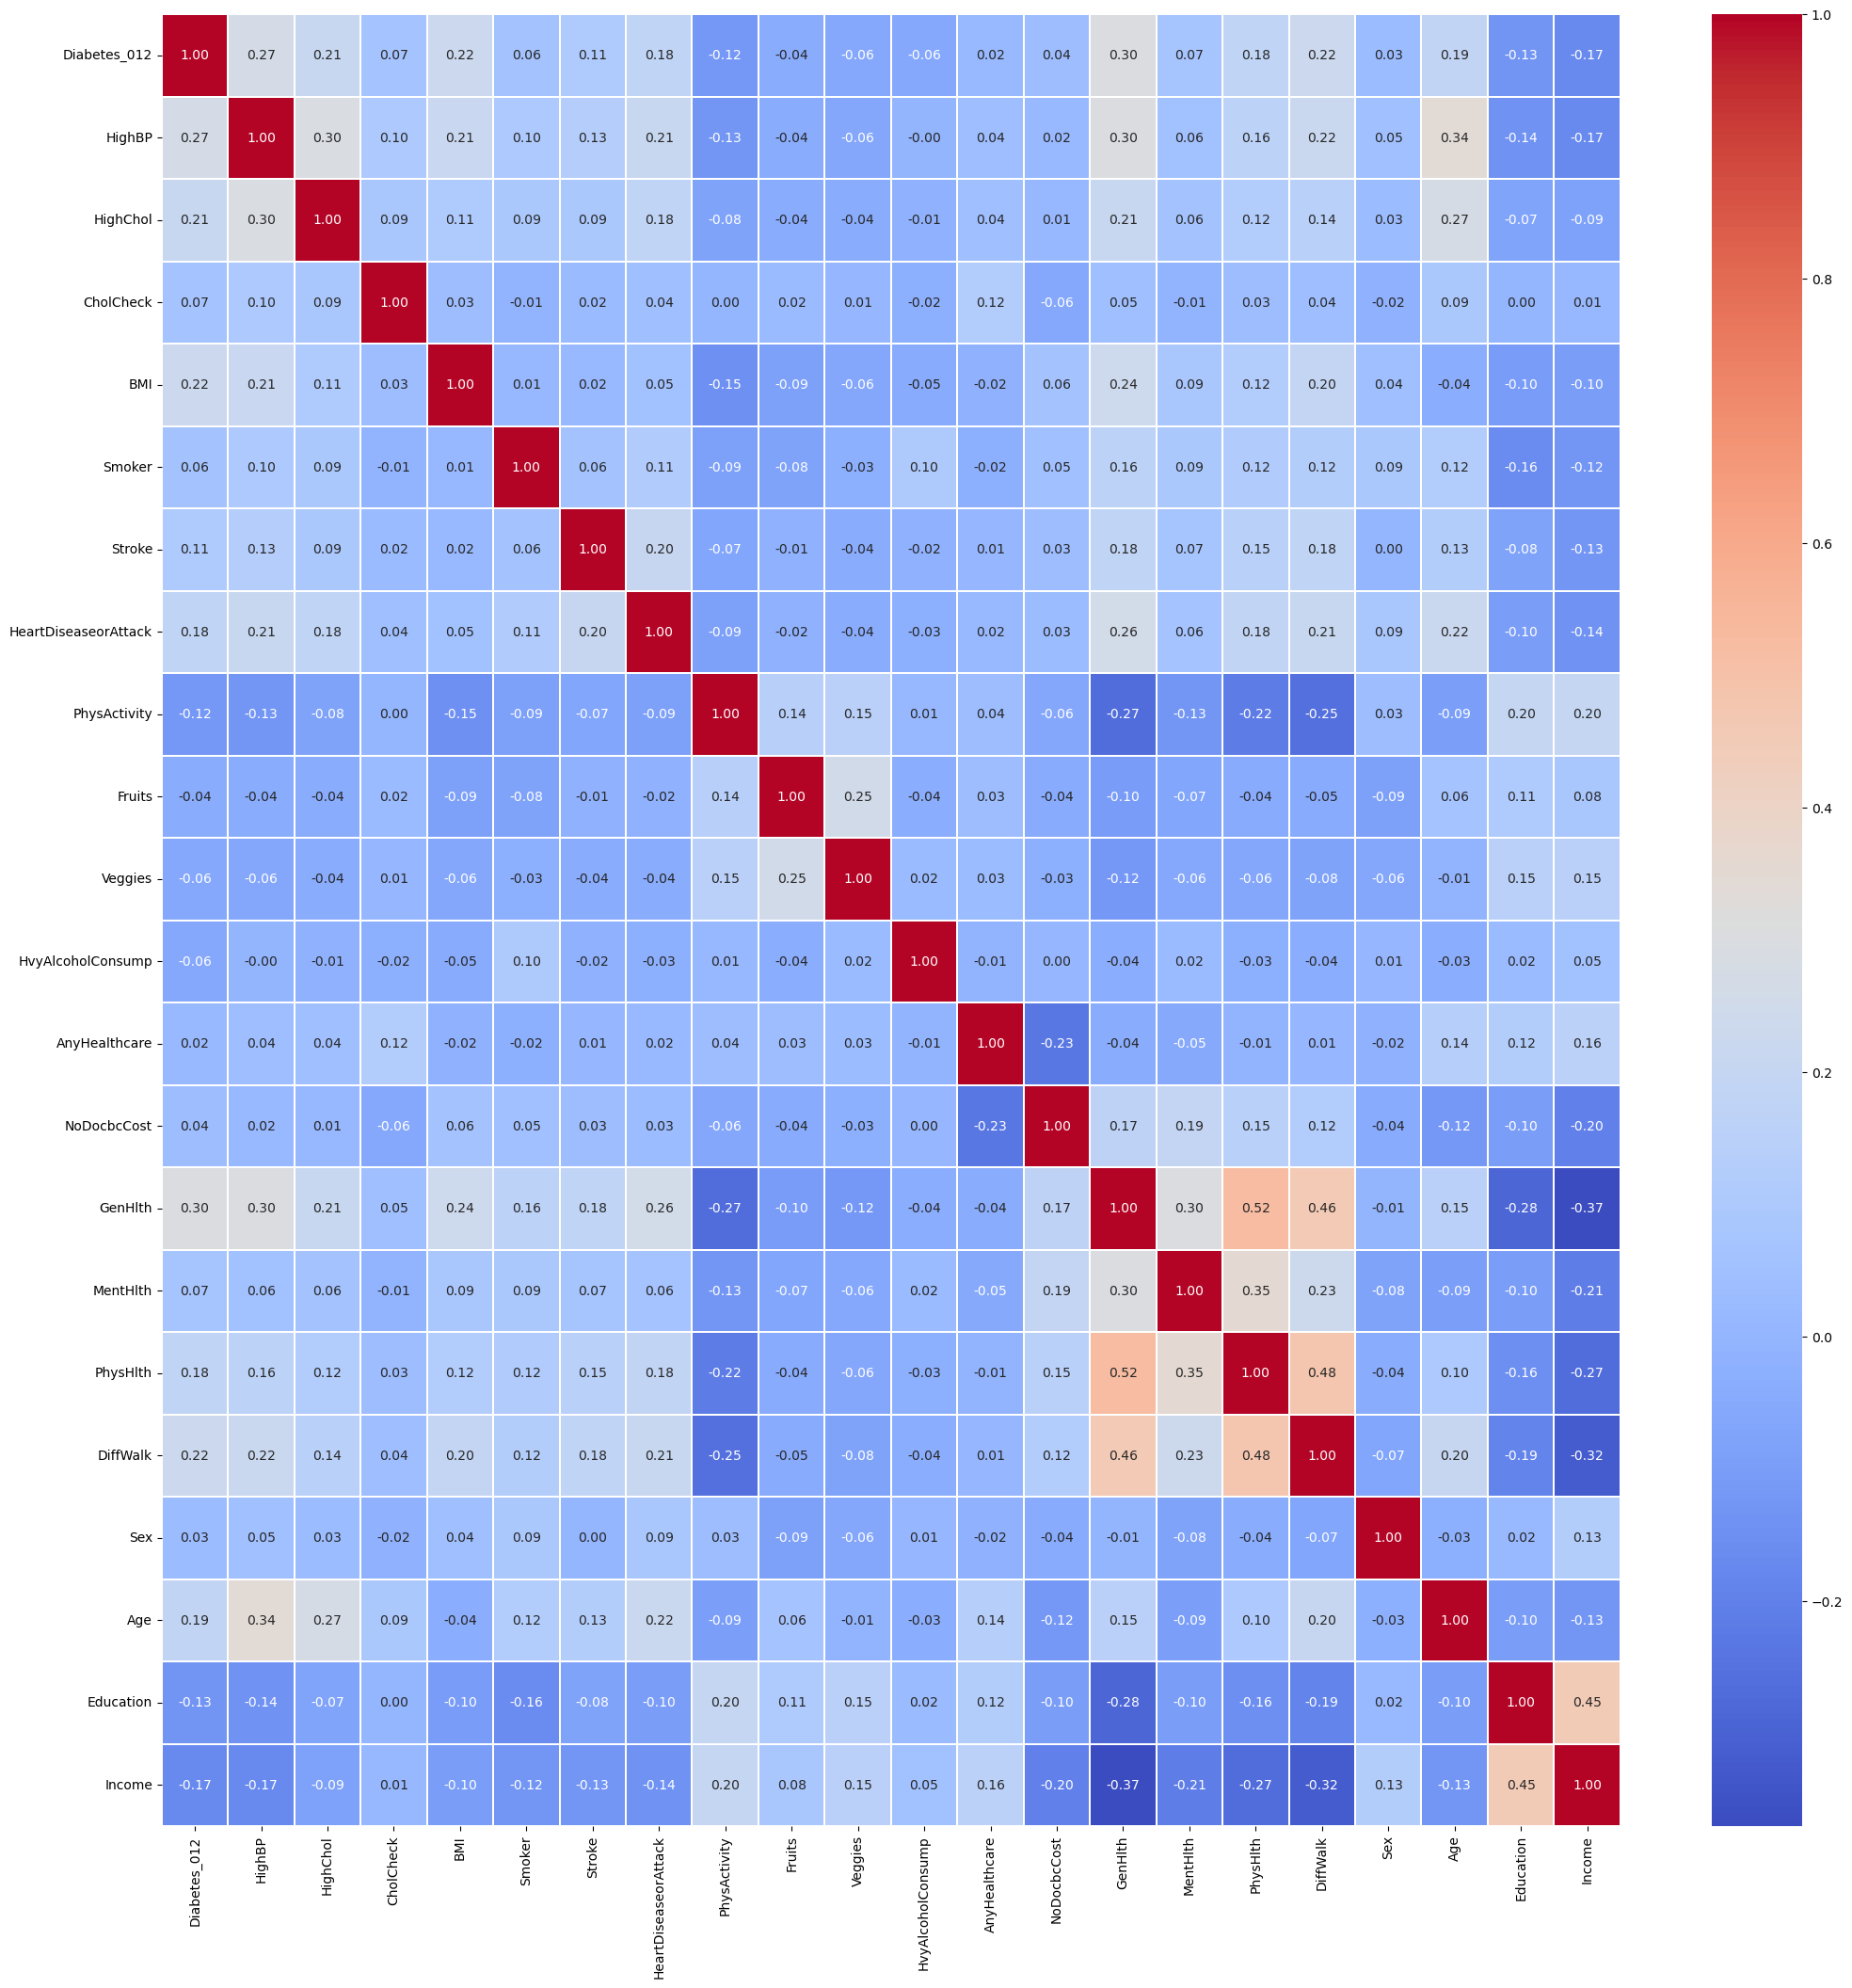

In [6]:
plt.figure(figsize=(25, 25))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2)

In [7]:
X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

In [8]:
X['Age'].nunique()


13

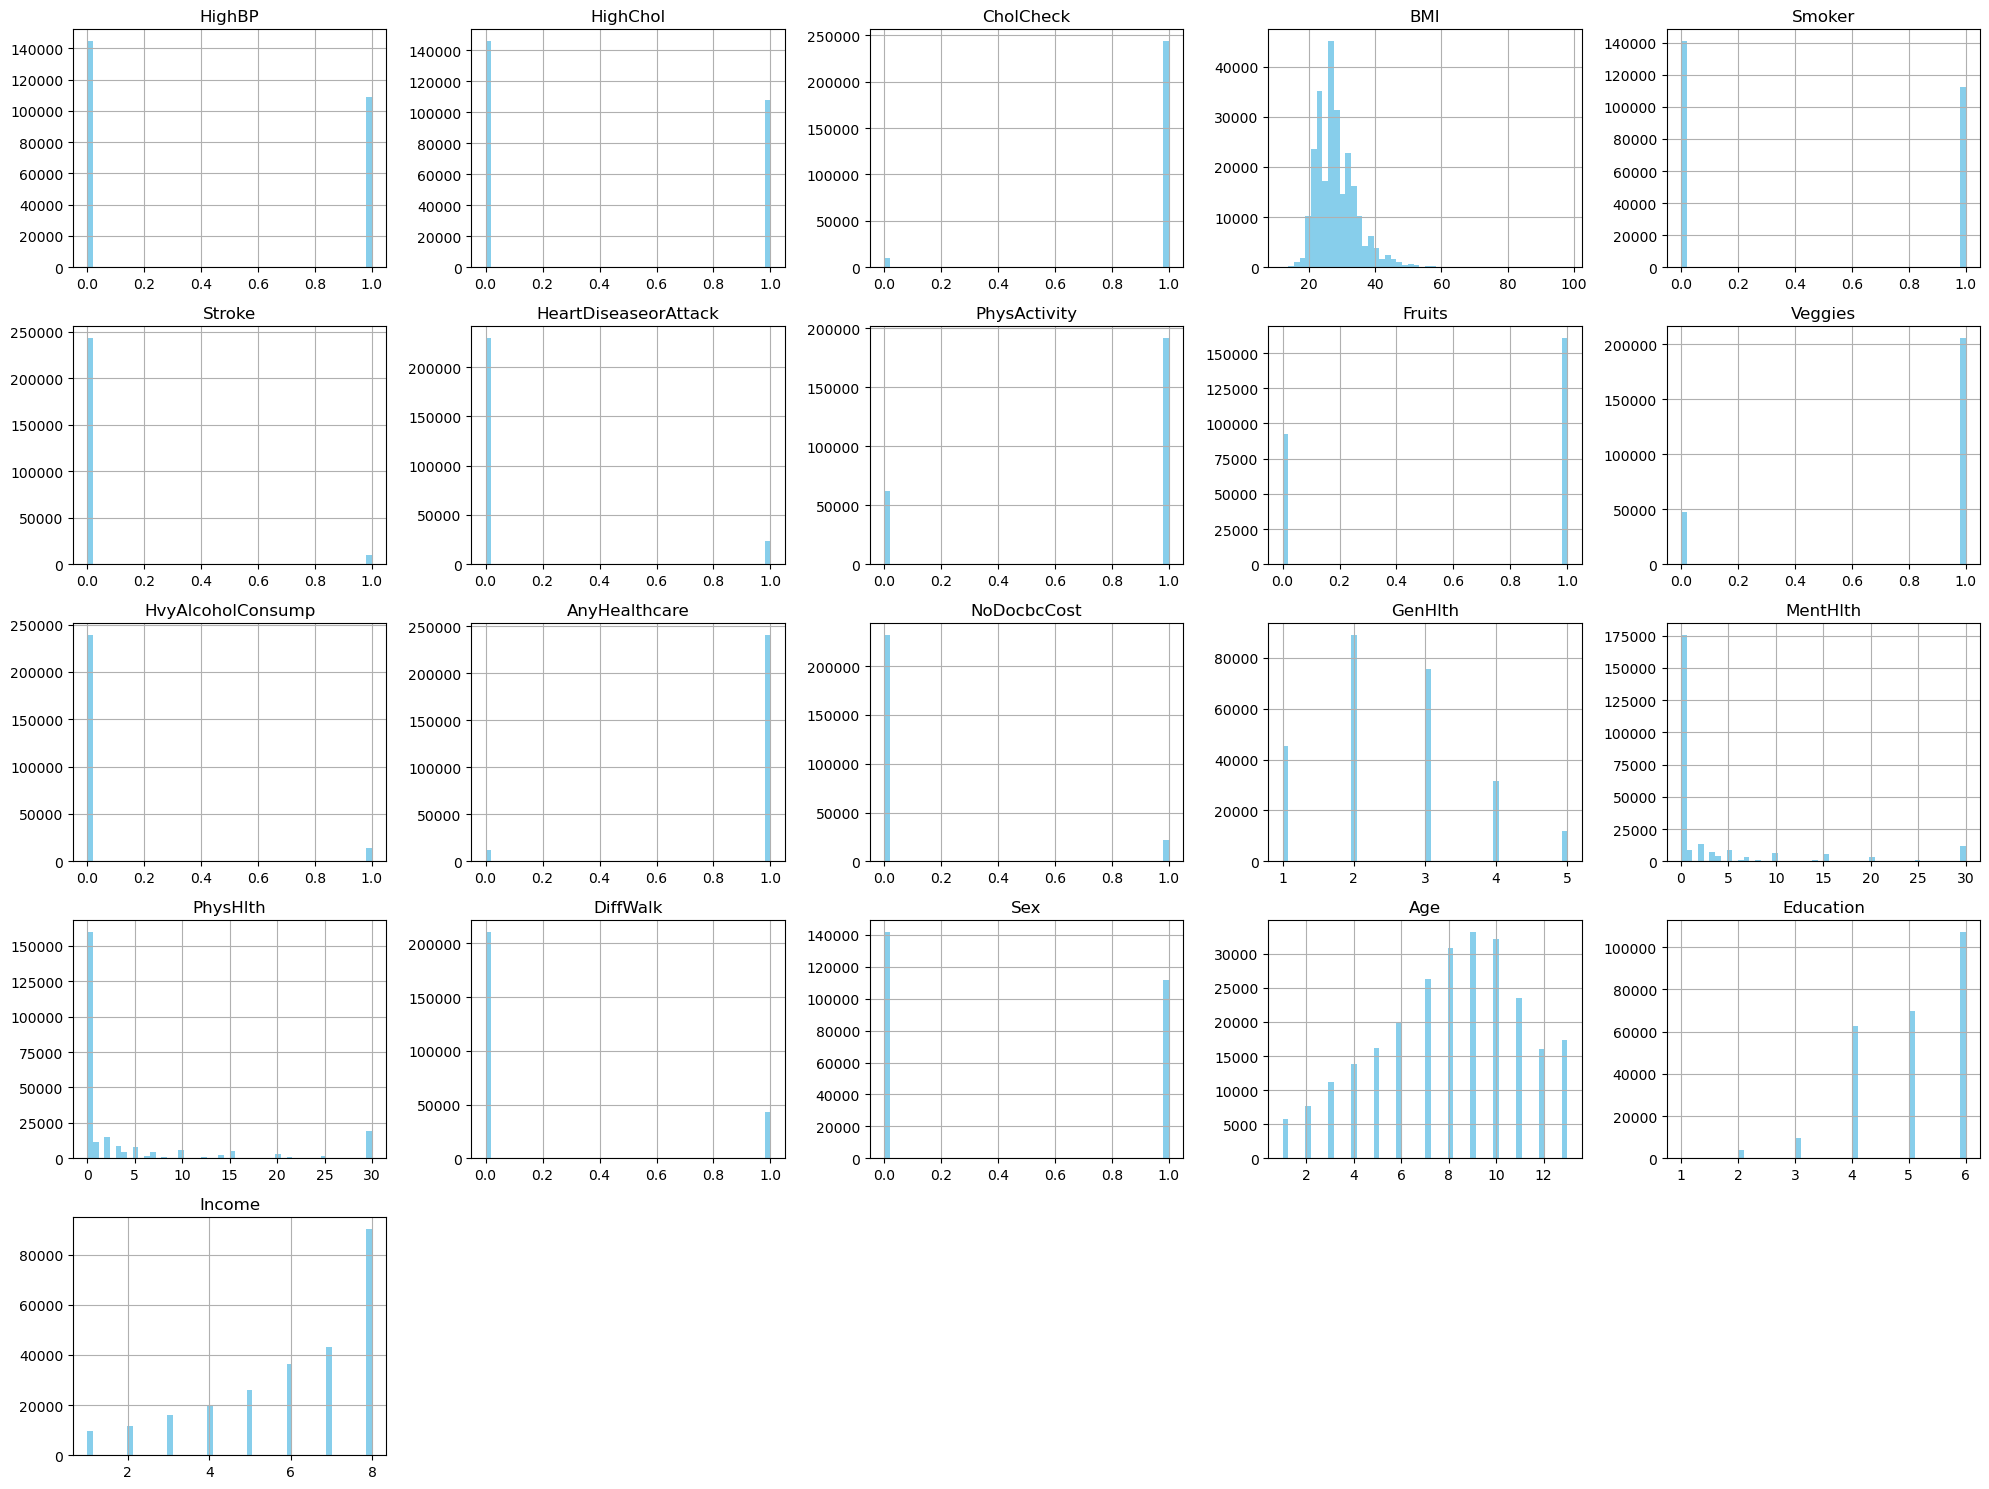

In [9]:
X.hist(bins=50, figsize=(20, 15), color='skyblue')
plt.tight_layout()

In [10]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,0.056197,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,0.230302,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


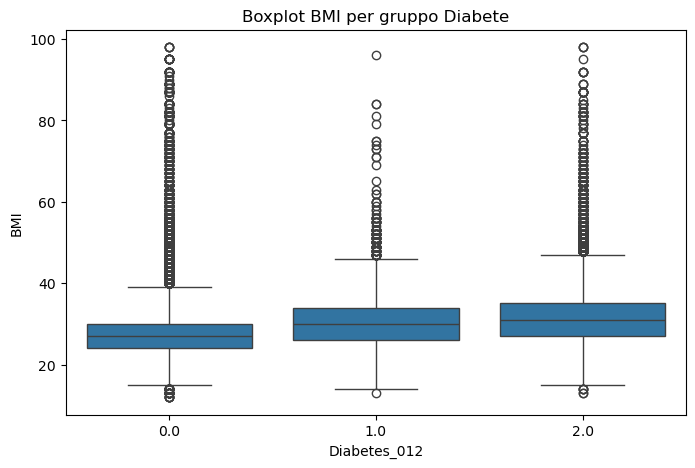

In [11]:
'''
Mediana crescente: passando da 0 a 2, la linea centrale (mediana) del BMI tende a salire leggermente, indicando che le persone con diabete tendono ad avere BMI più alti.

Dispersione simile: l’intervallo interquartile (la “scatola”) è simile per tutti i gruppi, ma leggermente più alto per 1 e 2.

Molti outlier: tutti i gruppi hanno parecchi valori estremi di BMI, anche oltre 80-90, il che è piuttosto elevato e raro nella popolazione generale.

Whiskers più lunghi nei gruppi 1 e 2: indica una maggiore variabilità nei valori alti di BMI per chi ha prediabete o diabete.
'''
plt.figure(figsize=(8,5))
sns.boxplot(x='Diabetes_012', y='BMI', data=df)
plt.title('Boxplot BMI per gruppo Diabete')
plt.show()

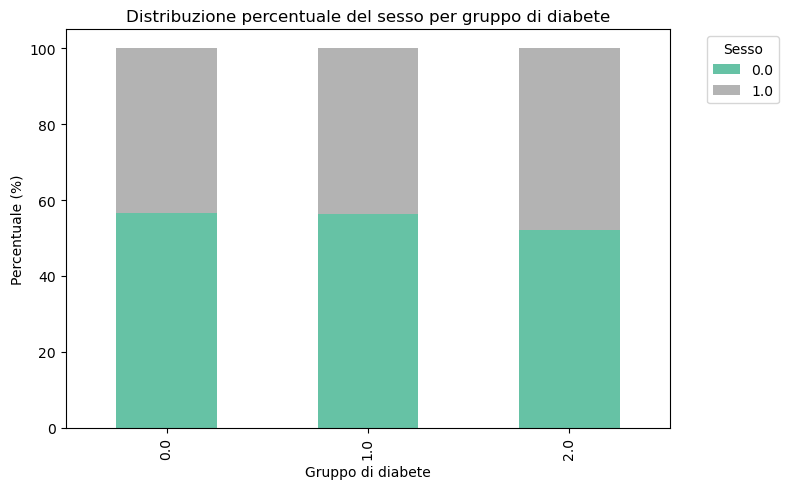

In [12]:
gender_counts = df.groupby(['Diabetes_012', 'Sex']).size().unstack(fill_value=0)
gender_percent = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
ax = gender_percent.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Set2')

plt.title("Distribuzione percentuale del sesso per gruppo di diabete")
plt.ylabel("Percentuale (%)")
plt.xlabel("Gruppo di diabete")
plt.legend(title="Sesso", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

C:\Users\MARTINADICORATO\AppData\Local\Temp\ipykernel_6708\2519424076.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Gruppo di diabete")


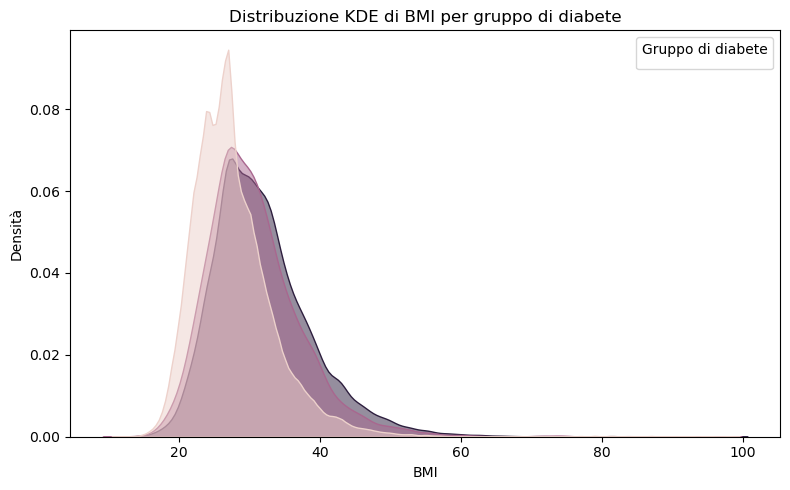

In [13]:
'''
Le aree colorate mostrano la densità dei valori per ogni gruppo.

Le differenze nelle curve ti fanno capire dove ogni gruppo è più concentrato (es. se i diabetici hanno BMI più alti).
'''
variabile = "BMI"

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x=variabile, hue="Diabetes_012", fill=True, common_norm=False, alpha=0.5)

plt.title(f"Distribuzione KDE di {variabile} per gruppo di diabete")
plt.xlabel(variabile)
plt.ylabel("Densità")
plt.legend(title="Gruppo di diabete")
plt.tight_layout()
plt.show()